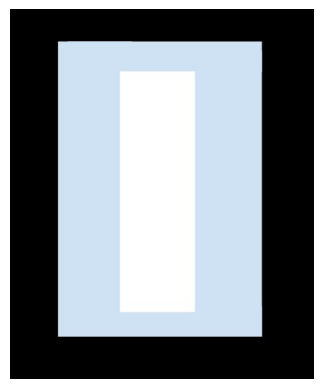

In [68]:
from PIL import Image
import matplotlib.pyplot as plt

# Open and display the image
img = Image.open('test2.jpg')  # replace with your image file name
plt.imshow(img)
plt.axis('off')
plt.show()

## Explanation
- grey scales image and applies Canny Edge Detection
- picks point outside of tissue and extends sample to include white region (stroma) inside the tissue
- reliant on color checking for white interior with exact RGB

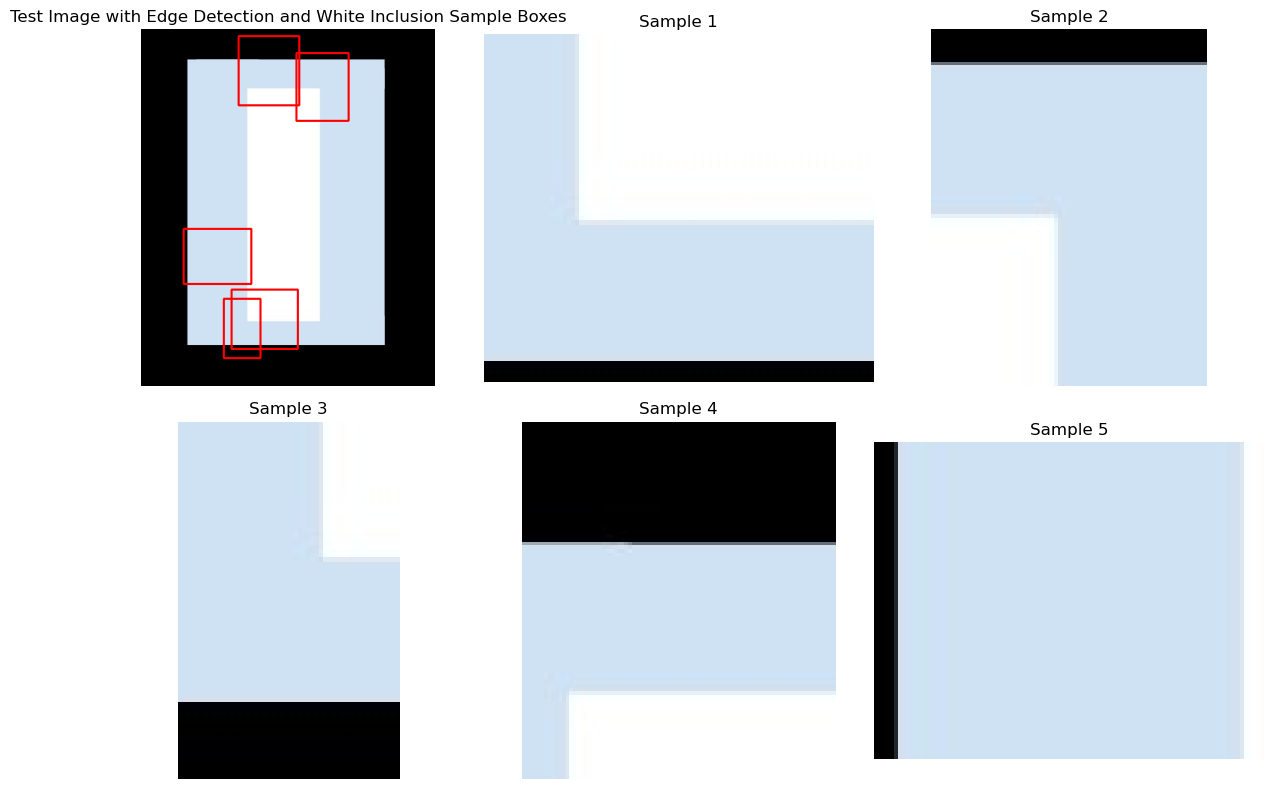

In [95]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the edge detection and sampling process
def edge_detection_sample_with_white_inclusion(image, num_samples=5, min_size=(40, 40), max_size=(100, 100)):
    # Convert the image to grayscale for edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Apply Canny edge detection
    edges = cv2.Canny(gray, 100, 200)
    
    height, width = image.shape[:2]
    samples = []
    sample_coords = []
    
    for _ in range(num_samples):
        attempts = 0
        while attempts < 100:  # Limit attempts to avoid endless loop
            attempts += 1
            
            # Randomly pick a point in the black area (outer region) and try to extend the sample to include the white region
            center_x = random.randint(min_size[0] // 2, width - min_size[0] // 2)
            center_y = random.randint(min_size[1] // 2, height - min_size[1] // 2)

            # Define the sample box
            sample_width = random.randint(min_size[0], max_size[0])
            sample_height = random.randint(min_size[1], max_size[1])
            x1 = max(0, center_x - sample_width // 2)
            y1 = max(0, center_y - sample_height // 2)
            x2 = min(width, center_x + sample_width // 2)
            y2 = min(height, center_y + sample_height // 2)
            
            # Crop the sample and check edge detection within the box
            sample_rgb = image[y1:y2, x1:x2]
            sample_edges = edges[y1:y2, x1:x2]
            
            # Ensure sample contains edges and includes the white region as well
            white_pixels = np.sum(np.all(sample_rgb == [255, 255, 255], axis=-1))  # Pure white pixels
            if np.sum(sample_edges) > 100 and white_pixels > 50:  # Include both edges and white stroma
                samples.append(sample_rgb)
                sample_coords.append((x1, y1, x2, y2))
                break
    
    return samples, sample_coords

# Load the test image
image_path_test = 'test2.jpg'  # Update this path as needed
image_test = cv2.imread(image_path_test)

# Convert the test image to RGB for edge detection
image_rgb_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)

# Use the edge detection and white inclusion sampling method
edge_samples_with_white, edge_sample_coords_with_white = edge_detection_sample_with_white_inclusion(
    image_rgb_test, num_samples=5, min_size=(40, 40), max_size=(100, 100))

# Draw red boxes around the sample areas on the test image
image_with_edge_boxes_and_white = image_rgb_test.copy()
for (x1, y1, x2, y2) in edge_sample_coords_with_white:
    cv2.rectangle(image_with_edge_boxes_and_white, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Red box

# Plot the overall image with red boxes and the individual samples
plt.figure(figsize=(12, 8))

# Plot the full image with sample boxes
plt.subplot(2, 3, 1)
plt.imshow(image_with_edge_boxes_and_white)
plt.title("Test Image with Edge Detection and White Inclusion Sample Boxes")
plt.axis('off')

# Plot each sample in its own subplot
for i, sample in enumerate(edge_samples_with_white):
    plt.subplot(2, 3, i + 2)
    plt.imshow(sample)
    plt.title(f"Sample {i + 1}")
    plt.axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## image with simulated melanocytes

<Figure size 1200x800 with 0 Axes>

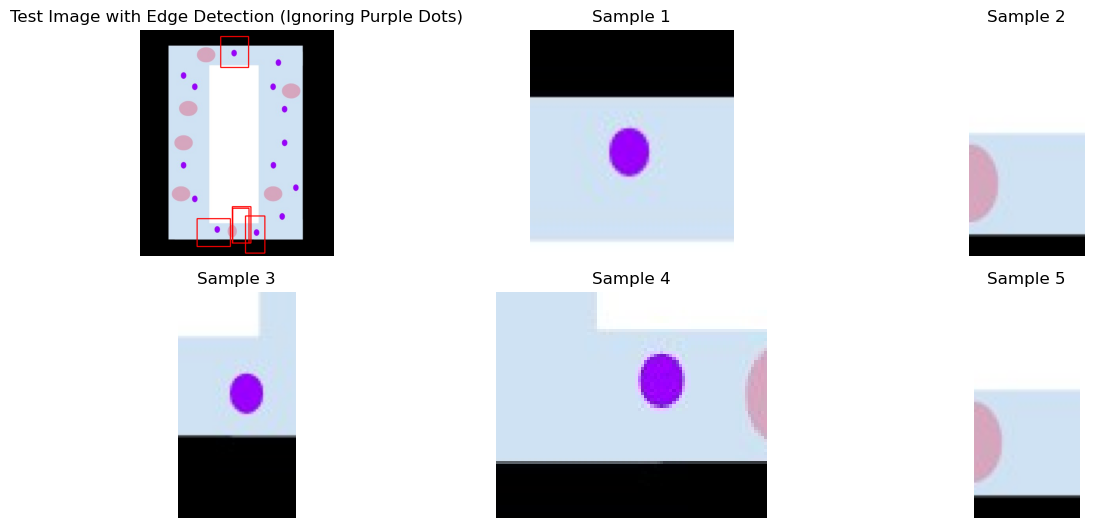

In [93]:
image_with_cells_path = 'with_cells2.jpg'
image_with_cells = cv2.imread(image_with_cells_path)

# Convert the image to RGB for processing
image_rgb_with_cells = cv2.cvtColor(image_with_cells, cv2.COLOR_BGR2RGB)

# Refine the edge detection sampling function to ignore purple dots
def refined_edge_detection_sample_ignore_purple(image, num_samples=5, min_size=(20, 20), max_size=(500, 500)):
    # Convert the image to grayscale for edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Apply Canny edge detection
    edges = cv2.Canny(gray, 100, 200)
    
    height, width = image.shape[:2]
    samples = []
    sample_coords = []
    
    for _ in range(num_samples):
        attempts = 0
        while attempts < 100:  # Limit attempts to avoid endless loop
            attempts += 1
            
            # Randomly pick a point in the black area (outer region) and try to extend the sample to include the white region
            center_x = random.randint(min_size[0] // 2, width - min_size[0] // 2)
            center_y = random.randint(min_size[1] // 2, height - min_size[1] // 2)

            # Define the sample box
            sample_width = random.randint(min_size[0], max_size[0])
            sample_height = random.randint(min_size[1], max_size[1])
            x1 = max(0, center_x - sample_width // 2)
            y1 = max(0, center_y - sample_height // 2)
            x2 = min(width, center_x + sample_width // 2)
            y2 = min(height, center_y + sample_height // 2)
            
            # Crop the sample and check edge detection within the box
            sample_rgb = image[y1:y2, x1:x2]
            sample_edges = edges[y1:y2, x1:x2]
            
            # Ensure sample contains edges and includes the white region as well, ignore purple dots
            white_pixels = np.sum(np.all(sample_rgb == [255, 255, 255], axis=-1))  # Pure white pixels
            black_pixels = np.sum(np.all(sample_rgb == [0, 0, 0], axis=-1))  # Black pixels
            
            # Check that the sample contains both white and black areas, and ignore purple
            if np.sum(sample_edges) > 100 and white_pixels > 50 and black_pixels > 50:
                samples.append(sample_rgb)
                sample_coords.append((x1, y1, x2, y2))
                break
    
    return samples, sample_coords

# Use the refined sampling method to ignore the purple dots and capture valid regions
samples_with_cells, sample_coords_with_cells = refined_edge_detection_sample_ignore_purple(
    image_rgb_with_cells, num_samples=5, min_size=(40, 40), max_size=(100, 100))

# Draw red boxes around the sample areas on the test image
image_with_cells_and_boxes = image_rgb_with_cells.copy()
for (x1, y1, x2, y2) in sample_coords_with_cells:
    cv2.rectangle(image_with_cells_and_boxes, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Red box

# Plot the overall image with red boxes and the individual samples
plt.figure(figsize=(12, 8))

num_samples = len(samples_with_cells)
cols = 3  # Number of columns
rows = (num_samples + 1) // cols + 1  # Dynamically calculate rows based on number of samples

plt.figure(figsize=(12, 8))

# Plot the full image with sample boxes
plt.subplot(rows, cols, 1)
plt.imshow(image_with_cells_and_boxes)
plt.title("Test Image with Edge Detection (Ignoring Purple Dots)")
plt.axis('off')

# Plot each sample in its own subplot
for i, sample in enumerate(samples_with_cells):
    plt.subplot(rows, cols, i + 2)
    plt.imshow(sample)
    plt.title(f"Sample {i + 1}")
    plt.axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Problems to fix
- This is a pretty dumbed down version of what the tissue actually looks like but was used to extract an algorithm while my team/other teams clean up noise and refine the extraction
- Edge detection allows samples to be the correct width/height, but script relies on color checking interior as white's RGB code which may become more difficult with an actual tissue with noise 
<br>
## Next steps
- Integrate this same idea with high quality epithelium extractions